In [1]:
import pandas as pd
import pandas_datareader.data as web
import datetime as dt
import numpy as np
from data.fmp import get_daily_prices

# Retrieve Close Price Data

In [15]:
SYMBOL = 'AAPL'
df = get_daily_prices(SYMBOL)
df = df[['Close']]
df

,Close
Date,
2016-09-01,26.682501
2016-09-02,26.932501
2016-09-06,26.924999
2016-09-07,27.090000
2016-09-08,26.379999
...,...
2021-08-25,148.360000
2021-08-26,147.540000
2021-08-27,148.600000


# Historical Drawdowns

<AxesSubplot:xlabel='Date'>

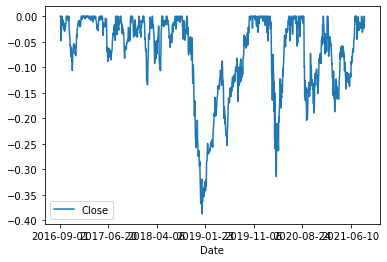

In [16]:
daily_returns = df.pct_change()
wealth_idx = 1 * (1 + daily_returns).cumprod()
previous_peaks = wealth_idx.cummax()
drawdown = (wealth_idx - previous_peaks)/previous_peaks
drawdown.plot()

# Maximum Drawdown

In [12]:
mdd = drawdown.min()
print("Maximum Drawdown (MDD) over the entire period = {}".format(
    mdd.values[0].round(2)))

x = drawdown.idxmin().values[0]
x = pd.to_datetime(x)
print("The date of MDD = {}".format(str(x.date())))

Maximum Drawdown (MDD) over the entire period = -0.39
The date of MDD = 2019-01-03
